In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
from sympy import *
init_printing()

![title](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTnckDYbeTb2T8_xBI46WAEajS_3IZMY1frutUDEFwRivqayUyU)

What is Carrying Capacity?

Exponential growth has each generation grown at a rate $r$: 
$$P_n = P_{n-1} + r P_{n-1}$$

$$P_n = P_{n-1} +  \color{red}{r\Big(1 - \frac{P_{n-1}}{K}\Big)} P_{n-1}  $$

If you set $K x_n = P_{n}$ $\implies$ $x_{n} = rx_{n-1}(1-x_{n-1})$, recovering the model we discussed last class.

In [2]:
def logistic1(x, r, K):
    return x + r * (1 - x / K) * x

In [25]:
logistic1(500., .5, 2000.)


In [26]:
logistic1(5000., .5, 2000.)

[5500.0, 688.0, 913.0, 1161.0, 1405.0, 1614.0, 1770.0, 1872.0, 1932.0, 1965.0, 1982.0, 1991.0, 1995.0, 1998.0, 1999.0, 1999.0, 2000.0, 2000.0, 2000.0, 2000.0]


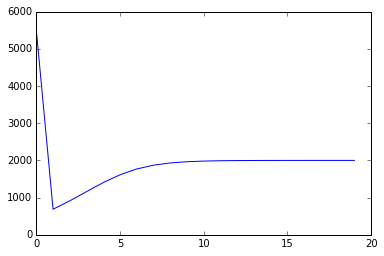

In [27]:
#x = 500
#x = 4500
x = 5500.
#x = 6000

rng = np.arange(1, 21)
h = []
for ii in rng:
    h.append(x)
    x = logistic1(x, .5, 2000.)

print([round(z) for z in h])

#rng = rng.insert(rng,0,0)
plt.plot(rng-1, h)
plt.show()

In [28]:
logistic1(10000., .5, 2000.)

What is Cancer?  What about human over-population?

Simple Interest:    $\color{blue}{I = P_0 r t}$
    $$A = P_0 + I = P_0 + \color{red}{P_0 r t} = P_0(1 + r t)$$

In [29]:
def simple_interest(P_0, r, t):
    interest = P_0 * r * t
    amt = interest + P_0
    return interest, amt

In [30]:
simple_interest(10, .1, 50)

In [31]:
.1/12

Compound Interest:  With $A_0$ being the initial amount borrowed, R the interest rate per period, e.g. R = 0.1, $$A_n = A_{n-1} + R A_{n-1}$$

For a yearly interest rate $r$, but $k$ compounding periods per yr, $$R = \frac{r}{k}$$

$$A_n = A_{n-1} + \color{red}{\frac{r}{k}} A_{n-1}$$

$$A_n = \color{red}{1}A_{n-1} + \color{red}{\frac{r}{k}} A_{n-1}$$

$$A_n = A_{n-1} \Big(1 + \frac{r}{k} \Big)$$

Solving for non-recursive version:

$$A_n = A_{0} \Big(1 + \frac{r}{k} \Big)^n$$

Let $P_N$ be the balance after $N$ years, then

$$n = N k$$  and     

$$A_{N k} = P_N =  P_{0} \Big(1 + \frac{r}{k} \Big)^{Nk}$$
As $k  \to \infty$, $$P(t) =  P_0 e^{rt}$$

In [32]:
def compound_interest(P_0, r, N, k):
    return P_0 * (1 + r / k)**(N*k)

In [33]:
compound_interest(100., .25, 5., 12.)

In [34]:
def continous_interest(P_0, r, t):
    return P_0 * math.exp(r*t)

In [35]:
continous_interest(100., .25, 5.)

Solve effective continuous rate for $r = .15$ compounded yearly $k = 1$.

$$P_{0} \Big(1 + \frac{r}{k} \Big)^{Nk} = P_0 e^{r_2 t}$$

$$\Big(1 + \frac{\color{red}{.15}}{\color{red}{1}} \Big)^{N\color{red}{1}} = e^{r_2 t}$$

$$\color{red}{\log\Big(}\Big(1.15 \Big)^{N}\color{red}{\Big)} = \color{red}{\log\Big(}e^{r_2 t}\color{red}{\Big)}$$
$$N \log\Big(1.15 \Big) = r_2 t$$

$N = t$, so,
$$\color{red}{t} \log\Big(1.15 \Big) = r_2 t$$

Cancel off $t$,
$$\log\Big(1.15 \Big) = r_2$$

In general, for $r$ compounding continuously, and log is the natural log, $$\log\Big(1 + APY \Big) = r$$

In [36]:
math.log(1.15) # natural log on calculators is ln

How rich would you be investing $5000 at 2% interest for 45 years?

In [38]:
continous_interest(5000., .02, 45.)

Not so fast! Inflation averages 3.22%

In [39]:
continous_interest(5000., -.0022, 45.)

Annuities:

$$P = \frac{d[(1+\frac{r}{k})^{Nk} - 1]}{r/k}$$

In [40]:
def annuity(r, k, N, d):
    return d * k * ((1 + r / k) ** (N * k) - 1) / r

In [41]:
ret = annuity(r=.02, k=12, N=40, d=2000)
ret

In [42]:
ret*math.exp(-.0322*40)

Payout Annuities:

$$P = \frac{d[1-(1+\frac{r}{k})^{-Nk}]}{r/k}$$

In [43]:
def payout_annuity(r, k, N, d):
    return d * k * (1 - (1 + r / k) ** (-N * k)) / r

In [44]:
payout_annuity(r=.02, k=12, N=20, d=2500)

Suppose you'll have 500000 to retire, and you need 3000 / month. With a 6% interest rate compounding monthly, how long will it last?

$$P_0 = \frac{d[1-(1+\frac{r}{k})^{-Nk}]}{r/k}$$
$$\color{red}{500000} = \frac{\color{red}{3000}[1-(1+\color{red}{\frac{.06}{12}})^{-N\color{red}{12}}]}{\color{red}{.06/12}}$$

Solve for $N$:

$$500000 = 600000[1-(1.005)^{-N12}]$$

$$\frac{5}{6} = 1-(1.005)^{-N12}$$

$$\frac{5}{6} -1 = -(1.005)^{-N12}$$

$$\frac{-5}{6} +1 = (1.005)^{-N12}$$

$$\frac{1}{6} = 1.0616778^{-N}$$


$$\color{red}{\log\Big(}\frac{1}{6}\color{red}{\Big)} = \color{red}{\log(}1.0616778^{-N}\color{red}{)}$$

$$-1.791759 = -N\log(1.0616778)$$

$$-1.791759 = -N0.0599$$

$$-1.791759/(-0.0599) = N$$

In [45]:
math.log(1./6)

In [46]:
x=math.log(1./6)
y=-math.log(1.005**12)
print(x,y)
x/y

(-1.791759469228055, -0.059850498132467664)


Loans Formula (It's the same as a payout annuity. Why?)

$$P_0 = \frac{d[1-(1+\frac{r}{k})^{-Nk}]}{r/k}$$

In [47]:
loans = payout_annuity

In [48]:
loans(r=.02, k=12, N=20, d=1500)

As rates go up, what happens to home prices?

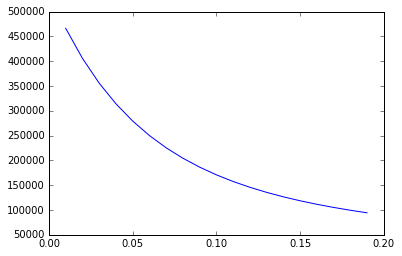

In [49]:
rates = np.arange(.01, .2, .01)
afford = [loans(r=r, k=12, N=30, d=1500) for r in rates]    
plt.plot(rates, afford)
plt.show()

What's the monthly payment for a home loan if $r=.05$, $k=12$, $N=30$, and $P_0 = 300000$?

$$P_0 = \frac{d[1-(1+\frac{r}{k})^{-Nk}]}{r/k}$$

$$300000 = \frac{d[1-(1+\frac{.05}{12})^{-30 * 12}]}{.05/12}$$

$$300000 = d * 186.281617$$

$$d=1610.46$$

In [50]:
mortgage_term = 15
rate = .05
x = (1 - (1 + rate / 12)**(-mortgage_term * 12)) / (rate / 12)
d = 300000 / x
print(x)
print(d)

126.455242706
2372.38088022


Total cost overall:

In [51]:
d * mortgage_term * 12

Adjust for inflation?

In [52]:
P_0, d, r, k, N = symbols('P_0, d, r, k, N')

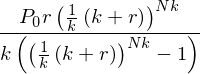

In [53]:
expr = solve(d * (1 - (1 + r / k)**(-N * k)) / ( r / k) - P_0, d)[0]
expr

In [54]:
# Try various rates
#rt = .02
#rt = .03
#rt = .05
rt = .057
#rt = .12
#rt = .16
mortgage_term = 15
loan = 120000
pmt = expr.subs([(r, rt), (k, 12), (N, mortgage_term), (P_0, loan)])
pmt

('Total borrowed: $', 120000)
('Total projected inflation adjusted cost: $', 141990.36)
('Total non-adjusted cost: $', 178790.79)
('Total inflation adjusted interest paid: $', 21990.36)
('Percent more paid (adjusted): ', 18.325, '%')


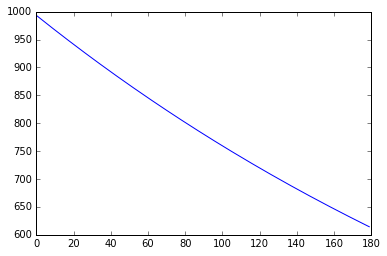

In [57]:
avg_inflation = 0.0322 # using geometric mean
K = range(12 * mortgage_term)
#print(K)
all_pmt = [round(continous_interest(pmt, -avg_inflation, m / 12.), 2) for m in K]
infl_adj_cost = round(sum(all_pmt), 2)
print("Total borrowed: $", loan)
print("Total projected inflation adjusted cost: $", infl_adj_cost)
print("Total non-adjusted cost: $", round(mortgage_term * 12 * pmt, 2))
print("Total inflation adjusted interest paid: $", round(infl_adj_cost - loan, 2))
print("Percent more paid (adjusted): ", round(100 * (infl_adj_cost - loan) / loan, 3), "%")

#print(all_pmt)
plt.plot(K, all_pmt)

plt.show()
all_pmt

In [ ]:
# Wealth ineq, utility f, gini